**Task 2: Customer Segmentation**

In [1]:
# import the dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv('/content/Mall_Customers.csv')

In [3]:
# print the five first rows
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# print information about the data
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# check for missing values
customer_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [6]:
# Keep only income and spending score
x_col, y_col = "Annual Income (k$)", "Spending Score (1-100)"
df = customer_data[[x_col, y_col]].dropna()

In [7]:
print(df)

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


In [8]:
# scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.values)

In [9]:
print(X_scaled)

[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]
 [-1.66266033  1.00159627]
 [-1.62449091 -1.71591298]
 [-1.62449091  1.70038436]
 [-1.58632148 -1.83237767]
 [-1.58632148  0.84631002]
 [-1.58632148 -1.4053405 ]
 [-1.58632148  1.89449216]
 [-1.54815205 -1.36651894]
 [-1.54815205  1.04041783]
 [-1.54815205 -1.44416206]
 [-1.54815205  1.11806095]
 [-1.50998262 -0.59008772]
 [-1.50998262  0.61338066]
 [-1.43364376 -0.82301709]
 [-1.43364376  1.8556706 ]
 [-1.39547433 -0.59008772]
 [-1.39547433  0.88513158]
 [-1.3573049  -1.75473454]
 [-1.3573049   0.88513158]
 [-1.24279661 -1.4053405 ]
 [-1.24279661  1.23452563]
 [-1.24279661 -0.7065524 ]
 [-1.24279661  0.41927286]
 [-1.20462718 -0.74537397]
 [-1.20462718  1.42863343]
 [-1.16645776 -1.7935561 ]
 [-1.16645776  0.88513158]
 [-1.05194947 -1.7935561 ]
 [-1.05194947  1.62274124]
 [-1.05194947 -1.4053405 ]
 [-1.05194947  1.19570407]
 [-1.01378004 -1.28887582]
 

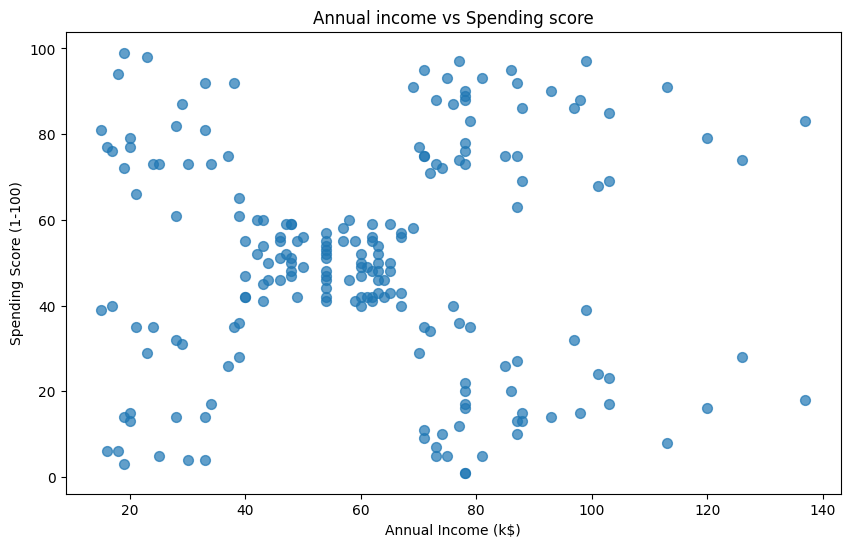

In [10]:
# visual exploration of groupings
plt.figure(figsize=(10, 6))
plt.scatter(df[x_col], df[y_col], s=50, alpha=0.7)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual income vs Spending score')
plt.show()

In [11]:
# apply K-Means & determine optimal k (elbow)
ks = list(range(1, 11))
inertias = []

for k in ks:
    # Why: explicit n_init for consistent results across sklearn versions.
    try:
        km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    except TypeError:
        km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

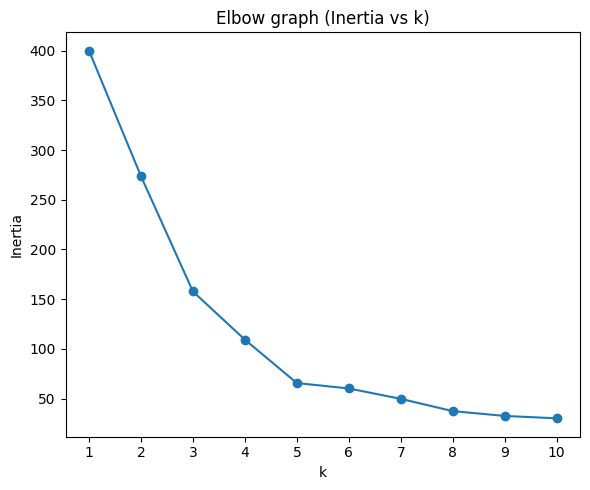

In [12]:
# Plot elbow curve
plt.figure(figsize=(6,5))
plt.plot(ks, inertias, marker="o")
plt.title("Elbow graph (Inertia vs k)")
plt.xlabel("k"); plt.ylabel("Inertia")
plt.xticks(ks)
plt.tight_layout(); plt.show()

Optimum number of clusters = 5

In [13]:
# train the KMeans cluster model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(df)
print(Y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


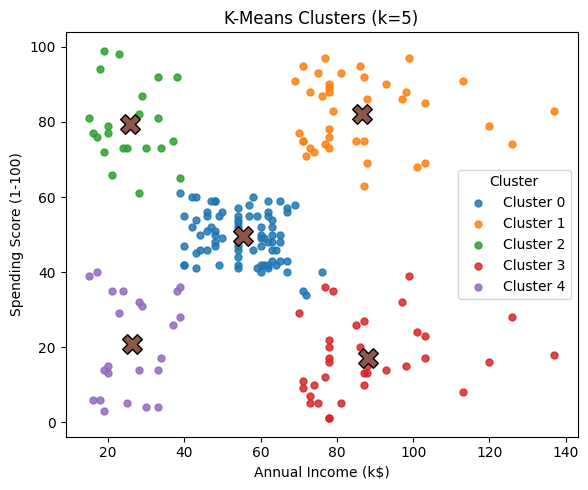

In [14]:
# visualizing clusters using 2D plots (income vs spending)

# infer the two feature names (expects your df has the two columns you clustered on)
x_col, y_col = df.columns[:2]

centers = kmeans.cluster_centers_

plt.figure(figsize=(6, 5))
for c in np.unique(Y):
    mask = (Y == c)
    plt.scatter(df.loc[mask, x_col], df.loc[mask, y_col], s=25, alpha=0.85, label=f"Cluster {c}")

# centroids in original units since you fit on df directly
plt.scatter(centers[:, 0], centers[:, 1], marker="X", s=200, edgecolor="k")  # why: highlight centers

plt.title("K-Means Clusters (k=5)")
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()